>The dataset contains raw data (over 1 million observations) for 9 different physical activities (such as walking, running, cycling, sitting, etc) performed by 7 subjects wearing each 3 inertial measurement units (IMU) and a heart rate monitor (HR). The IMU sensors were positioned as follows:

* 1 IMU on the right wrist of the user
* 1 IMU on the chest
* 1 IMU on the right ankle
* The IMU sensory data contains the following measures:
    3D-accelerometer data (m/s2)
    3D-gyroscope data (rad/s)
    3D-magnetometer data (μT)

>The IMU sensors have a sampling frequency of 100Hz and the sampling frequency of the HR-monitor is approximately 9Hz. Given the difference in the frequency of the captured data, the missing HR-values are indicated with NaN in the dataset. 



In [1]:
import pandas as pd, numpy as np
%matplotlib inline
%pylab inline
import seaborn  as sns 
import matplotlib.pyplot as plt
import folium
from folium import plugins
from mpl_toolkits.basemap import Basemap
import reverse_geocode 


# set plot style
matplotlib.style.use('fivethirtyeight')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (10,10)

Populating the interactive namespace from numpy and matplotlib


## 0) Load data and preprocess 

In [40]:
# help func
# feature engineering 
# -------------------------------

def get_wrist_accelerometer(x,y,z):
    #print ( np.sqrt(x**2 + y**2 + z**2))
    return np.sqrt(x**2 + y**2 + z**2)

def get_wrist_gyroscope():
    pass

def get_wrist_magnetometer():
    pass


# -------------------------------

In [22]:
df.columns

Index(['timestamp', 'activity_id', 'heart_rate', 'wrist_accelerometer_x',
       'wrist_accelerometer_y', 'wrist_accelerometer_z', 'wrist_gyroscope_x',
       'wrist_gyroscope_y', 'wrist_gyroscope_z', 'wrist_magnetometer_x',
       'wrist_magnetometer_y', 'wrist_magnetometer_z', 'chest_accelerometer_x',
       'chest_accelerometer_y', 'chest_accelerometer_z', 'chest_gyroscope_x',
       'chest_gyroscope_y', 'chest_gyroscope_z', 'chest_magnetometer_x',
       'chest_magnetometer_y', 'chest_magnetometer_z', 'ankle_accelerometer_x',
       'ankle_accelerometer_y', 'ankle_accelerometer_z', 'ankle_gyroscope_x',
       'ankle_gyroscope_y', 'ankle_gyroscope_z', 'ankle_magnetometer_x',
       'ankle_magnetometer_y', 'ankle_magnetometer_z', 'user_id'],
      dtype='object')

In [64]:
# load the data 

df=pd.read_csv('imu_activity_recognition.csv')



In [41]:
# feature extract 

# get wrist_accelerometer in 3-D
df['wrist_accelerometer'] = df.apply(lambda row : pd.Series(get_wrist_accelerometer(
                                                            row['wrist_accelerometer_x'],
                                                            row['wrist_accelerometer_y'],
                                                            row['wrist_accelerometer_z']))
                                                             ,axis=1)


In [44]:
#df[['wrist_accelerometer_x','wrist_accelerometer_y','wrist_accelerometer_z','wrist_accelerometer']]

## 1) Data overview

In [3]:
df.head(3)

,timestamp,activity_id,heart_rate,wrist_accelerometer_x,wrist_accelerometer_y,wrist_accelerometer_z,wrist_gyroscope_x,wrist_gyroscope_y,wrist_gyroscope_z,wrist_magnetometer_x,...,ankle_accelerometer_x,ankle_accelerometer_y,ankle_accelerometer_z,ankle_gyroscope_x,ankle_gyroscope_y,ankle_gyroscope_z,ankle_magnetometer_x,ankle_magnetometer_y,ankle_magnetometer_z,user_id
0,37.66,lying,NaN,2.21530,8.27915,5.58753,-0.004750,0.037579,-0.011145,8.93200,...,9.73855,-1.84761,0.095156,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,a
1,37.67,lying,NaN,2.29196,7.67288,5.74467,-0.171710,0.025479,-0.009538,9.58300,...,9.69762,-1.88438,-0.020804,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,a
2,37.68,lying,NaN,2.29090,7.14240,5.82342,-0.238241,0.011214,0.000831,9.05516,...,9.69633,-1.92203,-0.059173,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,a


(0, 20)

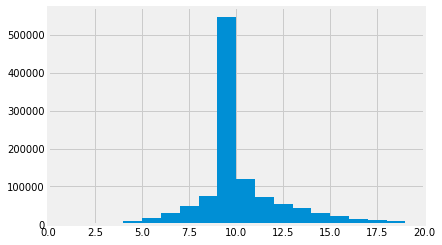

In [51]:
df['wrist_accelerometer'].hist(bins=range(0,20))
plt.xlim(0,20)

---- walking ----
---- lying ----
---- standing ----
---- sitting ----
---- cycling ----
---- ascending_stairs ----
---- descending_stairs ----
---- running ----
---- rope_jumping ----


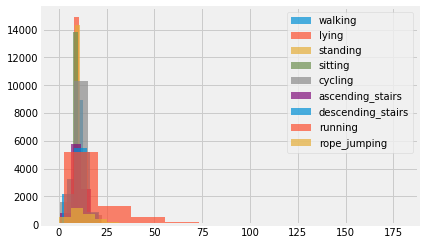

In [54]:



# wrist_accelerometer hist 


df_heart_rate= df[~df.heart_rate.isnull()]

for i in df.activity_id.value_counts().keys():
    print ('----', i, '----')
    df_heart_rate[df_heart_rate.activity_id == i]['wrist_accelerometer'].hist(alpha=.7)

legend(list(df.activity_id.value_counts().keys()))
#plt.xlim(0,20)
  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a9e47f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11addaf28>]], dtype=object)

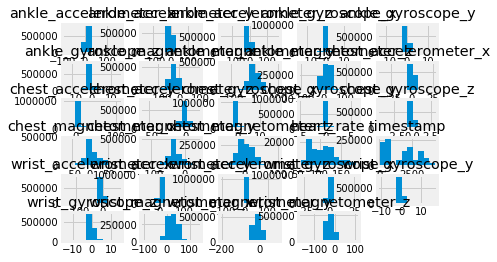

In [16]:
#fig, axs = plt.subplots(ncols=3,figsize=(15,3))
#plt.figure(figsize=(20, 6))
df.hist()

In [7]:
# heart rate

print ('null heart_rate :', len(df[df.heart_rate.isnull()]['heart_rate']))
print ('all data :', len(df))

null heart_rate : 1052560
all data : 1158399


---- walking ----
---- lying ----
---- standing ----
---- sitting ----
---- cycling ----
---- ascending_stairs ----
---- descending_stairs ----
---- running ----
---- rope_jumping ----


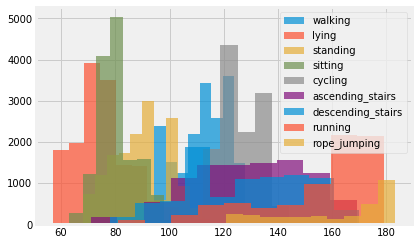

In [8]:
# heart rate hist 


df_heart_rate= df[~df.heart_rate.isnull()]

for i in df.activity_id.value_counts().keys():
    print ('----', i, '----')
    df_heart_rate[df_heart_rate.activity_id == i]['heart_rate'].hist(alpha=.7)

legend(list(df.activity_id.value_counts().keys()))

  

In [11]:
df.activity_id.value_counts()

walking              207228
lying                168358
standing             164771
sitting              162265
cycling              139125
ascending_stairs     105533
descending_stairs     95289
running               81667
rope_jumping          34163
Name: activity_id, dtype: int64

---- walking ----
---- lying ----
---- standing ----
---- sitting ----
---- cycling ----
---- ascending_stairs ----
---- descending_stairs ----
---- running ----
---- rope_jumping ----


(-20, 20)

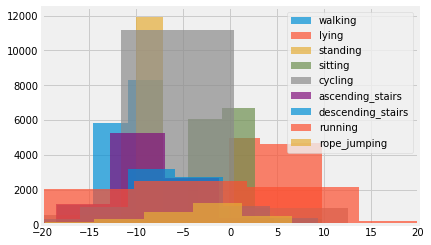

In [20]:
# wrist acce hist

for i in df.activity_id.value_counts().keys():
    print ('----', i, '----')
    df_heart_rate[df_heart_rate.activity_id == i]['wrist_accelerometer_x'].hist(alpha=.7)

legend(list(df.activity_id.value_counts().keys()))
plt.xlim(-20,20)
  

---- walking ----
---- lying ----
---- standing ----
---- sitting ----
---- cycling ----
---- ascending_stairs ----
---- descending_stairs ----
---- running ----
---- rope_jumping ----


(-20, 20)

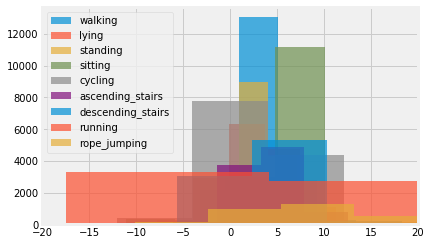

In [21]:
# wrist acce hist

for i in df.activity_id.value_counts().keys():
    print ('----', i, '----')
    df_heart_rate[df_heart_rate.activity_id == i]['wrist_accelerometer_y'].hist(alpha=.7)

legend(list(df.activity_id.value_counts().keys()))
plt.xlim(-20,20)
  

In [62]:
list(set(df.activity_id))

['rope_jumping',
 'lying',
 'running',
 'sitting',
 'standing',
 'walking',
 'cycling',
 'descending_stairs',
 'ascending_stairs']

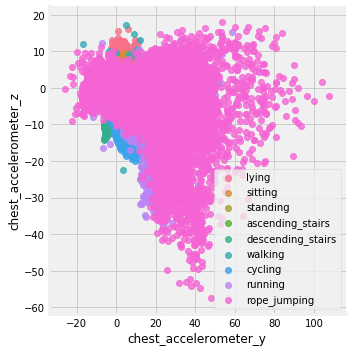

In [65]:
sns.lmplot( x="chest_accelerometer_y", y="chest_accelerometer_z", data=df, fit_reg=False, hue='activity_id', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')



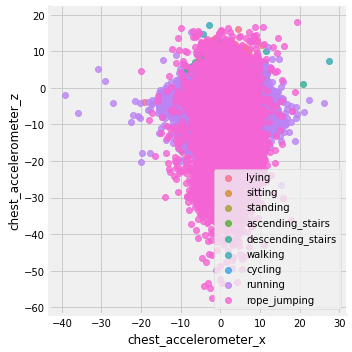

In [66]:
sns.lmplot( x="chest_accelerometer_x", y="chest_accelerometer_z", data=df, fit_reg=False, hue='activity_id', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')



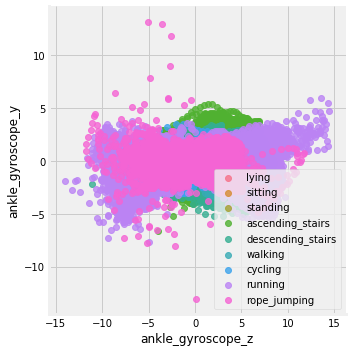

In [67]:
sns.lmplot( x="ankle_gyroscope_z", y="ankle_gyroscope_y", data=df, fit_reg=False, hue='activity_id', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')



In [55]:
df.head(3)

,timestamp,activity_id,heart_rate,wrist_accelerometer_x,wrist_accelerometer_y,wrist_accelerometer_z,wrist_gyroscope_x,wrist_gyroscope_y,wrist_gyroscope_z,wrist_magnetometer_x,...,ankle_accelerometer_y,ankle_accelerometer_z,ankle_gyroscope_x,ankle_gyroscope_y,ankle_gyroscope_z,ankle_magnetometer_x,ankle_magnetometer_y,ankle_magnetometer_z,user_id,wrist_accelerometer
0,37.66,lying,NaN,2.21530,8.27915,5.58753,-0.004750,0.037579,-0.011145,8.93200,...,-1.84761,0.095156,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,a,10.230952
1,37.67,lying,NaN,2.29196,7.67288,5.74467,-0.171710,0.025479,-0.009538,9.58300,...,-1.88438,-0.020804,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,a,9.855324
2,37.68,lying,NaN,2.29090,7.14240,5.82342,-0.238241,0.011214,0.000831,9.05516,...,-1.92203,-0.059173,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,a,9.496016


In [70]:
df.activity_id.value_counts()

walking              207228
lying                168358
standing             164771
sitting              162265
cycling              139125
ascending_stairs     105533
descending_stairs     95289
running               81667
rope_jumping          34163
Name: activity_id, dtype: int64

In [71]:
df[(df.user_id=='a') & (df.activity_id=='walking') ]

,timestamp,activity_id,heart_rate,wrist_accelerometer_x,wrist_accelerometer_y,wrist_accelerometer_z,wrist_gyroscope_x,wrist_gyroscope_y,wrist_gyroscope_z,wrist_magnetometer_x,...,ankle_accelerometer_x,ankle_accelerometer_y,ankle_accelerometer_z,ankle_gyroscope_x,ankle_gyroscope_y,ankle_gyroscope_z,ankle_magnetometer_x,ankle_magnetometer_y,ankle_magnetometer_z,user_id
103173,2245.97,walking,123.0,2.39384,7.36614,5.47782,-0.074232,-0.014551,-0.067214,4.71923,...,9.87658,-0.704361,-0.527956,-0.008637,-0.016637,0.010491,-55.1404,-29.03580,1.697770,a
103174,2245.98,walking,NaN,2.34508,7.32581,5.16933,-0.108821,-0.037727,-0.066742,5.17476,...,9.91181,-0.703956,-0.604777,0.020660,-0.004149,-0.013735,-55.2608,-28.37130,1.829620,a
103175,2245.99,walking,NaN,2.39758,7.51857,5.55434,-0.128258,-0.019805,-0.101513,4.26010,...,9.72959,-0.818282,-0.412988,0.019979,0.000796,-0.009751,-55.2457,-29.79770,1.195390,a
103176,2246.00,walking,NaN,2.31932,7.70784,5.43706,-0.183602,0.001794,-0.131620,4.39144,...,9.81014,-0.782394,-0.219437,0.014160,0.056483,0.009661,-56.0476,-28.34040,1.588830,a
103177,2246.01,walking,NaN,2.32734,7.89922,5.62898,-0.339090,0.004061,-0.131906,5.05504,...,9.91601,-0.743209,-0.450132,0.030738,-0.008582,-0.014538,-55.3821,-27.92090,1.464080,a
103178,2246.02,walking,NaN,2.29437,7.82497,5.78268,-0.508903,-0.021810,-0.142479,3.48090,...,9.87729,-0.780620,-0.488886,-0.000811,0.041551,0.007118,-56.0547,-28.11300,1.096190,a
103179,2246.03,walking,NaN,2.31425,7.17636,5.40029,-0.597664,-0.004694,-0.162305,4.47669,...,9.80283,-0.704208,-0.490124,-0.056108,-0.008528,0.002565,-56.0443,-28.99260,0.839170,a
103180,2246.04,walking,NaN,2.03013,6.72879,6.01335,-0.644259,-0.033576,-0.178887,4.59444,...,9.80923,-0.744104,-0.258273,0.011254,-0.002522,-0.042891,-55.4825,-28.25970,2.327740,a
103181,2246.05,walking,NaN,2.36677,6.42231,5.98094,-0.382528,-0.023116,-0.179309,5.01041,...,9.79533,-0.663991,-0.760578,-0.013923,0.032150,-0.003245,-55.8234,-28.34820,1.586910,a
103182,2246.06,walking,NaN,2.41257,6.99212,6.09516,-0.031576,-0.001185,-0.124717,4.69652,...,9.91440,-0.628661,-0.528038,0.002459,0.010579,0.009200,-55.1426,-28.60090,2.197540,a


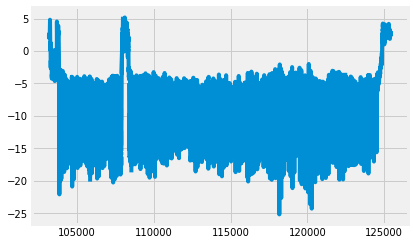

In [72]:
df[(df.user_id=='a') & (df.activity_id=='walking') ].wrist_accelerometer_x.plot()



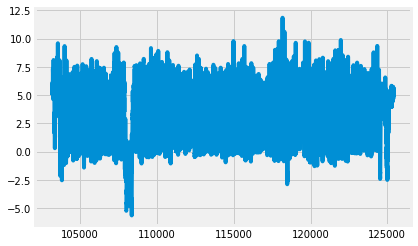

In [74]:
df[(df.user_id=='a') & (df.activity_id=='walking') ].wrist_accelerometer_z.plot()



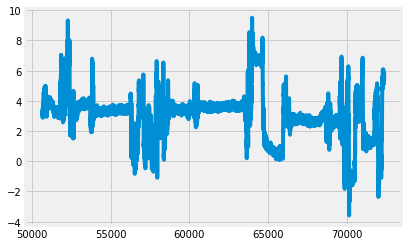

In [75]:
df[(df.user_id=='a') & (df.activity_id=='standing') ].wrist_accelerometer_z.plot()



In [56]:
df.columns

Index(['timestamp', 'activity_id', 'heart_rate', 'wrist_accelerometer_x',
       'wrist_accelerometer_y', 'wrist_accelerometer_z', 'wrist_gyroscope_x',
       'wrist_gyroscope_y', 'wrist_gyroscope_z', 'wrist_magnetometer_x',
       'wrist_magnetometer_y', 'wrist_magnetometer_z', 'chest_accelerometer_x',
       'chest_accelerometer_y', 'chest_accelerometer_z', 'chest_gyroscope_x',
       'chest_gyroscope_y', 'chest_gyroscope_z', 'chest_magnetometer_x',
       'chest_magnetometer_y', 'chest_magnetometer_z', 'ankle_accelerometer_x',
       'ankle_accelerometer_y', 'ankle_accelerometer_z', 'ankle_gyroscope_x',
       'ankle_gyroscope_y', 'ankle_gyroscope_z', 'ankle_magnetometer_x',
       'ankle_magnetometer_y', 'ankle_magnetometer_z', 'user_id',
       'wrist_accelerometer'],
      dtype='object')